In [247]:
import pandas as pd

from sklearn.Linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split as tts

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn.Linear_model'

#### Importing the Data

In [188]:
data = pd.read_csv('BTC_USD.csv')
# data.index = data['id']

FORECAST = 10 # Number of futute time block we want to predict

data['FORECAST_close'] = data['close'].shift(-FORECAST)
data = data[:-FORECAST]

#### Splitting into Train and Test Set

In [189]:
features = data.drop(columns=['time', 'timestamp', 'close', 'id', 'FORECAST_close'])
labels   = data['FORECAST_close']

C:\Users\ParthikB\AppData\Local\conda\conda\envs\global\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


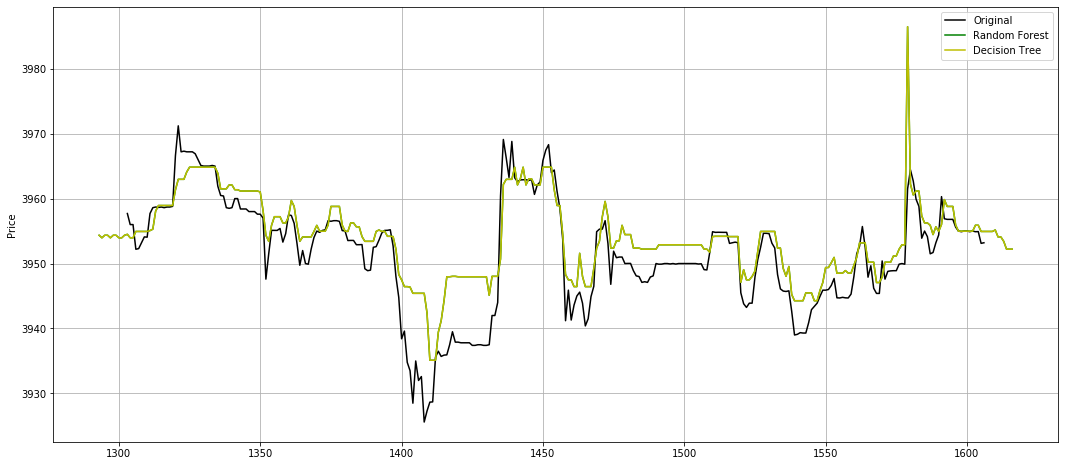

In [246]:
X_train, X_test, y_train, y_test = tts(features, labels, test_size=0.2, shuffle=False)

# DECISION TREE
model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train, y_train)

decision_pred = model.predict(X_test)

decision_pred = pd.DataFrame(pred)
# pred = pred[FORECAST:]
pred.index = y_test.index


# RANDOM FOREST
model = RandomForestRegressor(max_depth=5)

model.fit(X_train, y_train)

forest_pred = model.predict(X_test)

forest_pred = pd.DataFrame(pred)
# pred = pred[FORECAST:]
forest_pred.index = y_test.index





y_test = y_test.shift(FORECAST)[:-FORECAST]

plt.figure(figsize=(18, 8))
# plt.plot(y_train, label='training')
plt.plot(y_test, color='k', label='Original')
plt.plot(forest_pred, color='g', label='Random Forest')
plt.plot(decision_pred, color='y', label='Decision Tree')
plt.ylabel('Price')
plt.legend()
plt.grid(1)

C:\Users\ParthikB\AppData\Local\conda\conda\envs\global\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


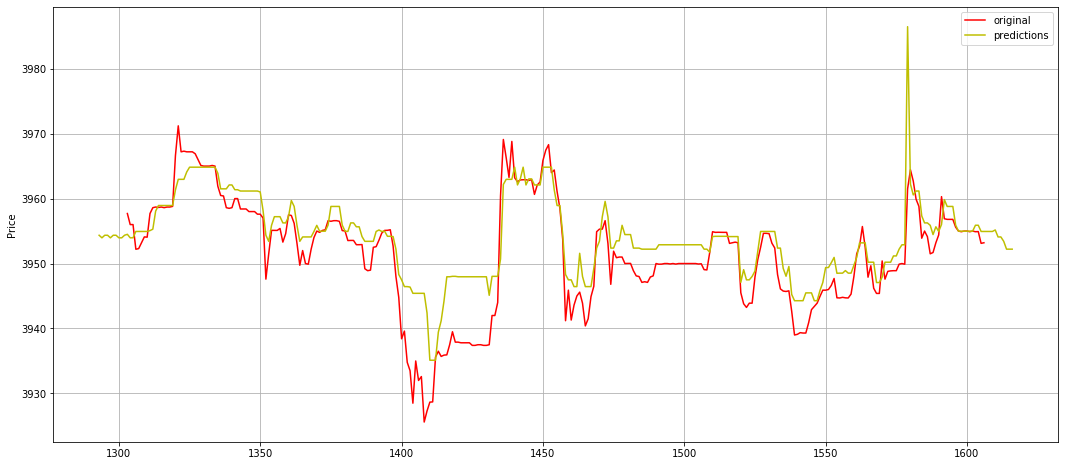